In [79]:
import numpy as np
import pandas as pd
from collections import Counter

In [80]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [81]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [82]:
# plotting the categories
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap  = ListedColormap(['#ff0000','#0000FF'])

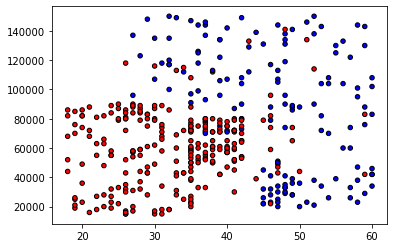

In [83]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c = y,cmap = cmap,edgecolors='k',s=20)
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size = 0.2,random_state=0)

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [86]:
class KNN:

    def __init__(self,k=5):
        self.k = k

    # in training step of KNN we just need to store the training data.
    # no computation is done in the training step

    def fit(self,X_train,y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self,X_test):
        y_pred = [self._predict(x) for x in X_test]
        y_pred = np.array(y_pred)
        return y_pred

    def _predict(self,x):
        # compute the distance from all points
        distances = [self.euclidean_distance(x,x_train) for x_train in self.X_train]
        
        # find the k nearest neighbours indices 
        k_indices = np.argsort(distances)[:self.k]
        # find their labels
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # find the most common class label
        # Counter gives the count of each k_nearest labels
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def euclidean_distance(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))

In [87]:
classifier = KNN(k = 5)

In [88]:
classifier.fit(X_train,y_train)

In [89]:
predictions = classifier.predict(X_test)

In [90]:
acc = np.sum(predictions==y_test)*100/len(y_test)
print('Accuracy = {} %'.format(acc))

Accuracy = 89.0625 %
